## House prices : Advanced Regression Techniques

## Summary

ask a home buyer to describe thier dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negitiations than the numberof bedrooms or white-picket fence. With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, lowa, this competiton challenges you to predict the final price of each home.

## Resources
- [Comprehensive data exploration with Python](https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python) by [Pedro Marcelino](https://www.kaggle.com/pmarcelino)
- [House Prices EDA](https://www.kaggle.com/dgawlik/house-prices-eda) by [Dominik Gawlik](https://www.kaggle.com/dgawlik)
- [Start Here: A Gentle Introduction](https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction) by [Will Koehrsen](https://www.kaggle.com/willkoehrsen/) - while this kernel is not analyzing the same data, it has concepts that I can easily follow as a beginner. 

## EDA

In [22]:
import os
import numpy as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import time

#import xgboost as xgb
from IPython.display import HTML, display #HTML로 불러온 내용을 display 

from scipy import stats # provide statisitcal functions
from scipy.stats import norm #정규분포(for CLT)
from sklearn.preprocessing import StandardScaler # 정규화 
from sklearn.model_selection import KFold #splirt train and test data
from sklearn.manifold import TSNE # T 분포
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error # accracy using MSE

#other settings
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 20
%config InlineBackend.figure_format='retina'
import warnings
warnings.filterwarnings("ignore")

In [23]:
#use inspect module to finde usage of mudules
import inspect, collections
from sklearn.manifold import TSNE
source=inspect.getsource(TSNE)
print(source)

class TSNE(BaseEstimator):
    """t-distributed Stochastic Neighbor Embedding.

    t-SNE [1] is a tool to visualize high-dimensional data. It converts
    similarities between data points to joint probabilities and tries
    to minimize the Kullback-Leibler divergence between the joint
    probabilities of the low-dimensional embedding and the
    high-dimensional data. t-SNE has a cost function that is not convex,
    i.e. with different initializations we can get different results.

    It is highly recommended to use another dimensionality reduction
    method (e.g. PCA for dense data or TruncatedSVD for sparse data)
    to reduce the number of dimensions to a reasonable amount (e.g. 50)
    if the number of features is very high. This will suppress some
    noise and speed up the computation of pairwise distances between
    samples. For more tips see Laurens van der Maaten's FAQ [2].

    Read more in the :ref:`User Guide <t_sne>`.

    Parameters
    ----------
    n_components 

### column describtions

In [31]:
f=open("data_description.txt","r")
print(f.read()) 

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [37]:
#seperate data by type. refer usder page
#https://www.kaggle.com/dgawlik/house-prices-eda
quant_vars= [f for f in train_df.columns if train_df.dtypes[f] != 'object']
quant_vars.remove('SalePrice')
quant_vars.remove("Id")
qual_vars = [f for f in train_df.columns if train_df.dtypes[f] == 'object']

there are 1460 instances of taining data and 1460 of test data. total number of attributes equals 81, of which 36 is quantitative, 43 categorical+Id and SalePrice.

Quantitative: 1stFlrSF, 2ndFlrSF, 3SsnPorch, BedroomAbvGr, BsmtFinSF1, BsmtFinSF2, BsmtFullBath, BsmtHalfBath, BsmtUnfSF, EnclosedPorch, Fireplaces, FullBath, GarageArea, GarageCars, GarageYrBlt, GrLivArea, HalfBath, KitchenAbvGr, LotArea, LotFrontage, LowQualFinSF, MSSubClass, MasVnrArea, MiscVal, MoSold, OpenPorchSF, OverallCond, OverallQual, PoolArea, ScreenPorch, TotRmsAbvGrd, TotalBsmtSF, WoodDeckSF, YearBuilt, YearRemodAdd, YrSold

Qualitative: Alley, BldgType, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, BsmtQual, CentralAir, Condition1, Condition2, Electrical, ExterCond, ExterQual, Exterior1st, Exterior2nd, Fence, FireplaceQu, Foundation, Functional, GarageCond, GarageFinish, GarageQual, GarageType, Heating, HeatingQC, HouseStyle, KitchenQual, LandContour, LandSlope, LotConfig, LotShape, MSZoning, MasVnrType, MiscFeature, Neighborhood, PavedDrive, PoolQC, RoofMatl, RoofStyle, SaleCondition, SaleType, Street, Utilities,

## datasets(train, test)

In [24]:
train_df=pd.read_csv("train.csv")
test_df=pd.read_csv("test.csv")

In [25]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [26]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## Data exploration

### 1.  Normal distribution

####  target variable

H0 : target variable을 SalePrice라고 한다. 의 귀무가설에서 target이 normal dist'n를 따른다면 이후에 다른 모델을 적용했을 때에, 더 잘 작동할 것이기 때문에 정규성 검정을 먼저 실시한다.(using QQ-plot)
->결과적으로는 정규성을 따르지 않는다
따라서 target variable로 설정했던 변수의 귀무가설을 기각하고, 다른 target variable을 설정한다

->어차피 CLT를 따르지 않을까라고 생각했지만, 아님. 왜? n의 값이 많이 크지 않아서라고 판단함.

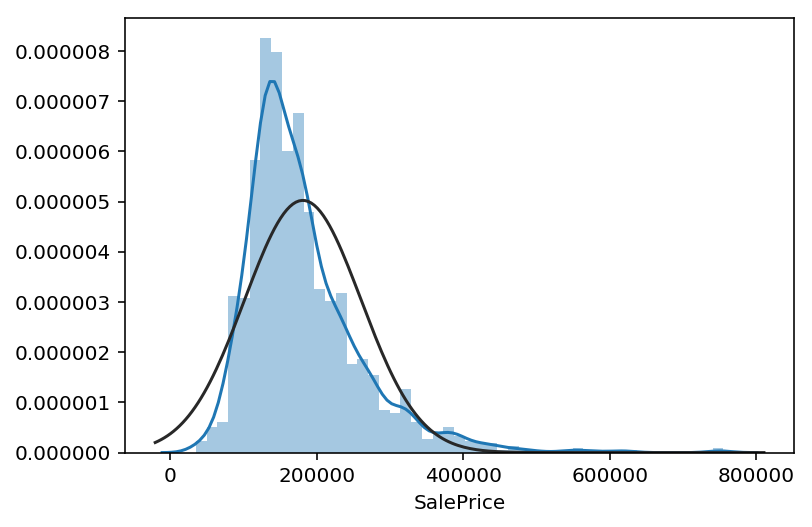

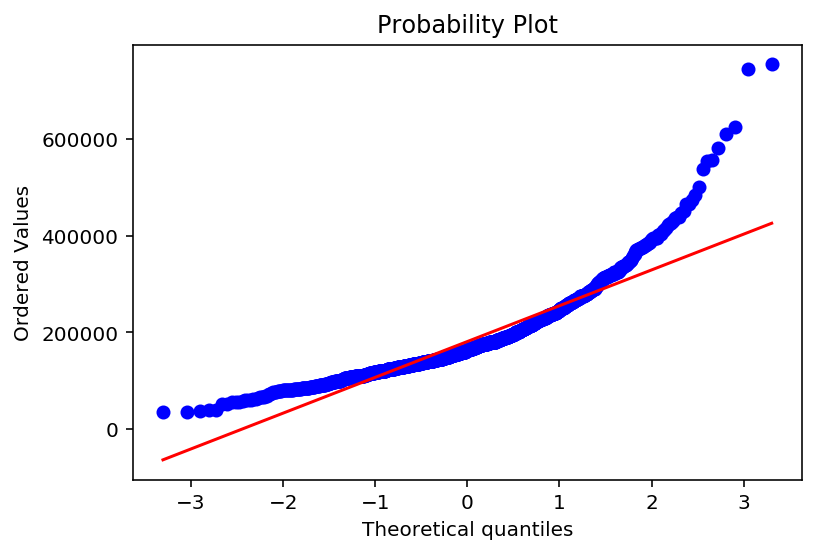

In [42]:
sns.distplot(train_df['SalePrice'],fit=norm);
fig=plt.figure()
res=stats.probplot(train_df['SalePrice'],plot=plt)
plt.show()

#### indep variables(독립변수)

not normally dist'n인 변수를 정규분포를 따르도록 변형하고, outliers를 걸러내기 위한다.(여기서 이상치는 3sigma이상으로 def)

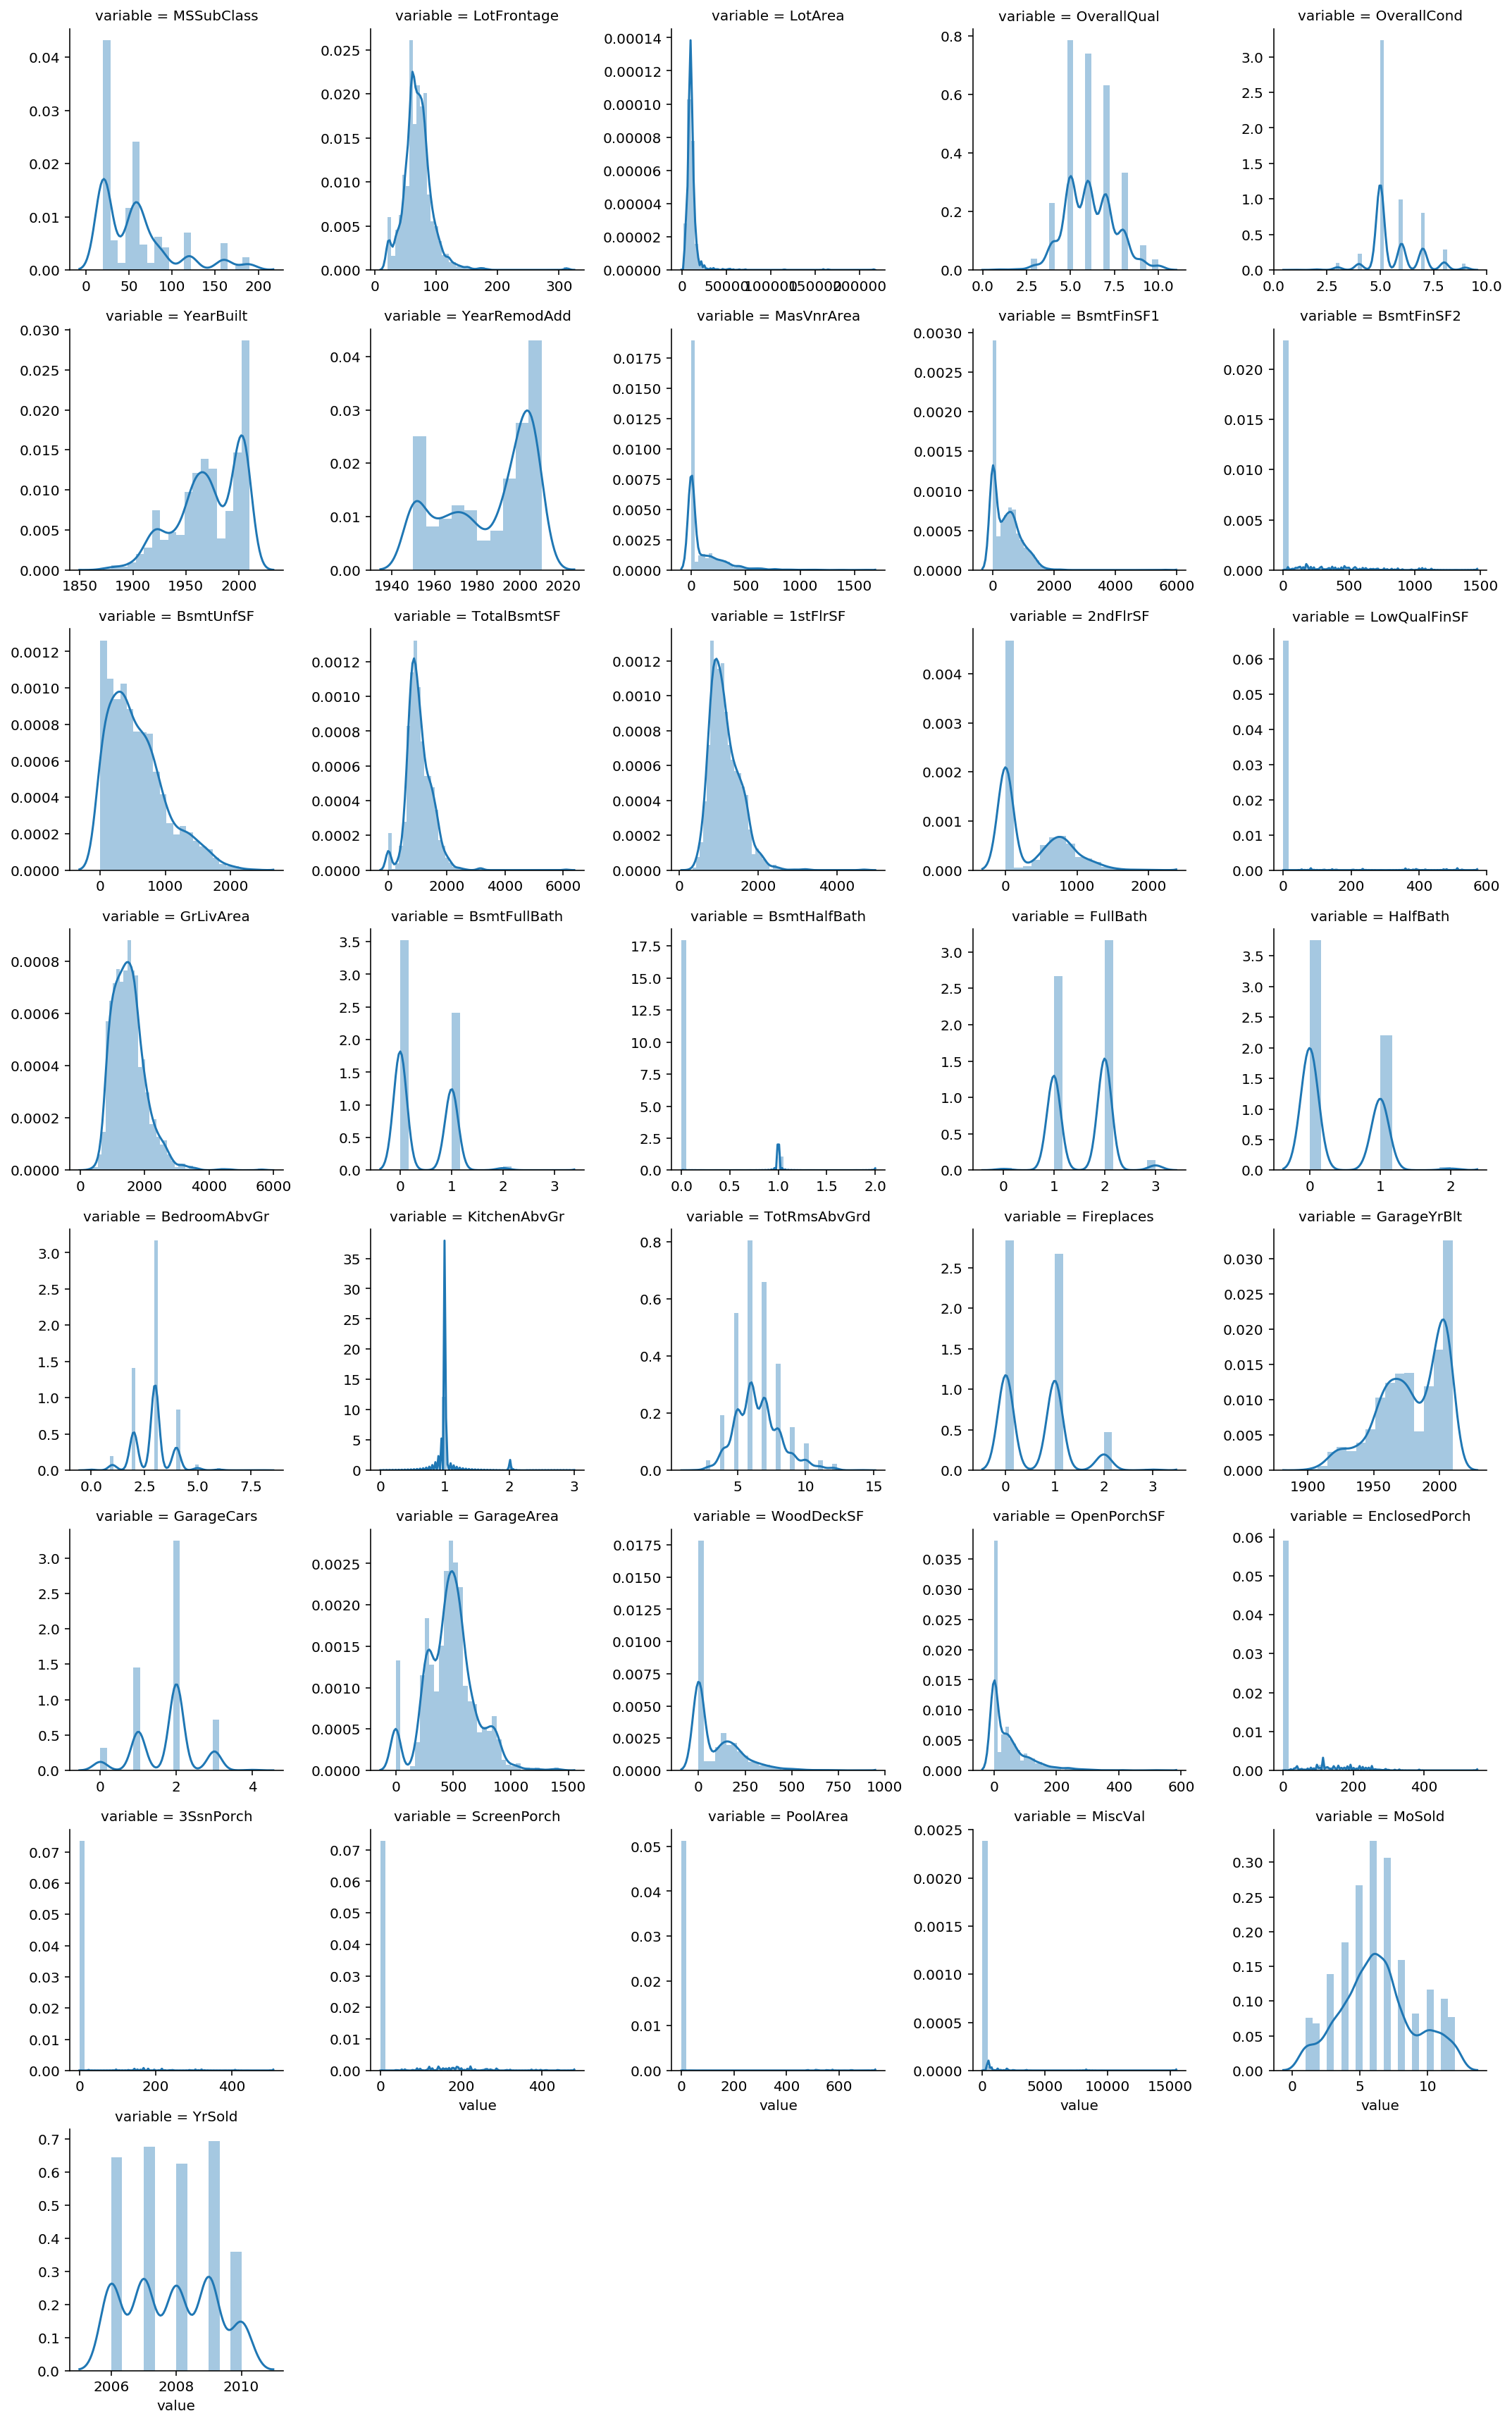

In [47]:
#데이터 재구조화(train_df's all column)
quant_vars_long=pd.melt(train_df,value_vars=quant_vars)

#FacetGrid of distplots :  show data as multiple axes grid
facet_grid_quant=sns.FacetGrid(quant_vars_long,col="variable",col_wrap=5,sharex=False,sharey=False)
facet_grid_quant=facet_grid_quant.map(sns.distplot,"value")

log transformation을 하게 되면 data간 편차를 줄여 skewness와 Kurtosis를 줄일 수 있기 때문에 정규성이 높아진다고 할 수 있다(정규성을 높이면 accuracy, 여기서는 MSE값이 높아지게 할 수가 있다)

Some indep variables look like good candidates for log transformation like TotalBsmtSF, KitchenAbvGr, LotFrontage, LotArea and others(skewness와 Kurtosis로 판단) 

### 2. Missing data

In [59]:
null_sum=train_df.isnull().sum().sort_values(ascending=False)
null_percent = (100*train_df.isnull().sum()/train_df.isnull().count()).round(1).sort_values(ascending=False)
null_overview=pd.concat([null_sum,null_percent],axis=1,keys=['Total','Percenet'])
null_overview.head()

,Total,Percenet
PoolQC,1453,99.5
MiscFeature,1406,96.3
Alley,1369,93.8
Fence,1179,80.8
FireplaceQu,690,47.3


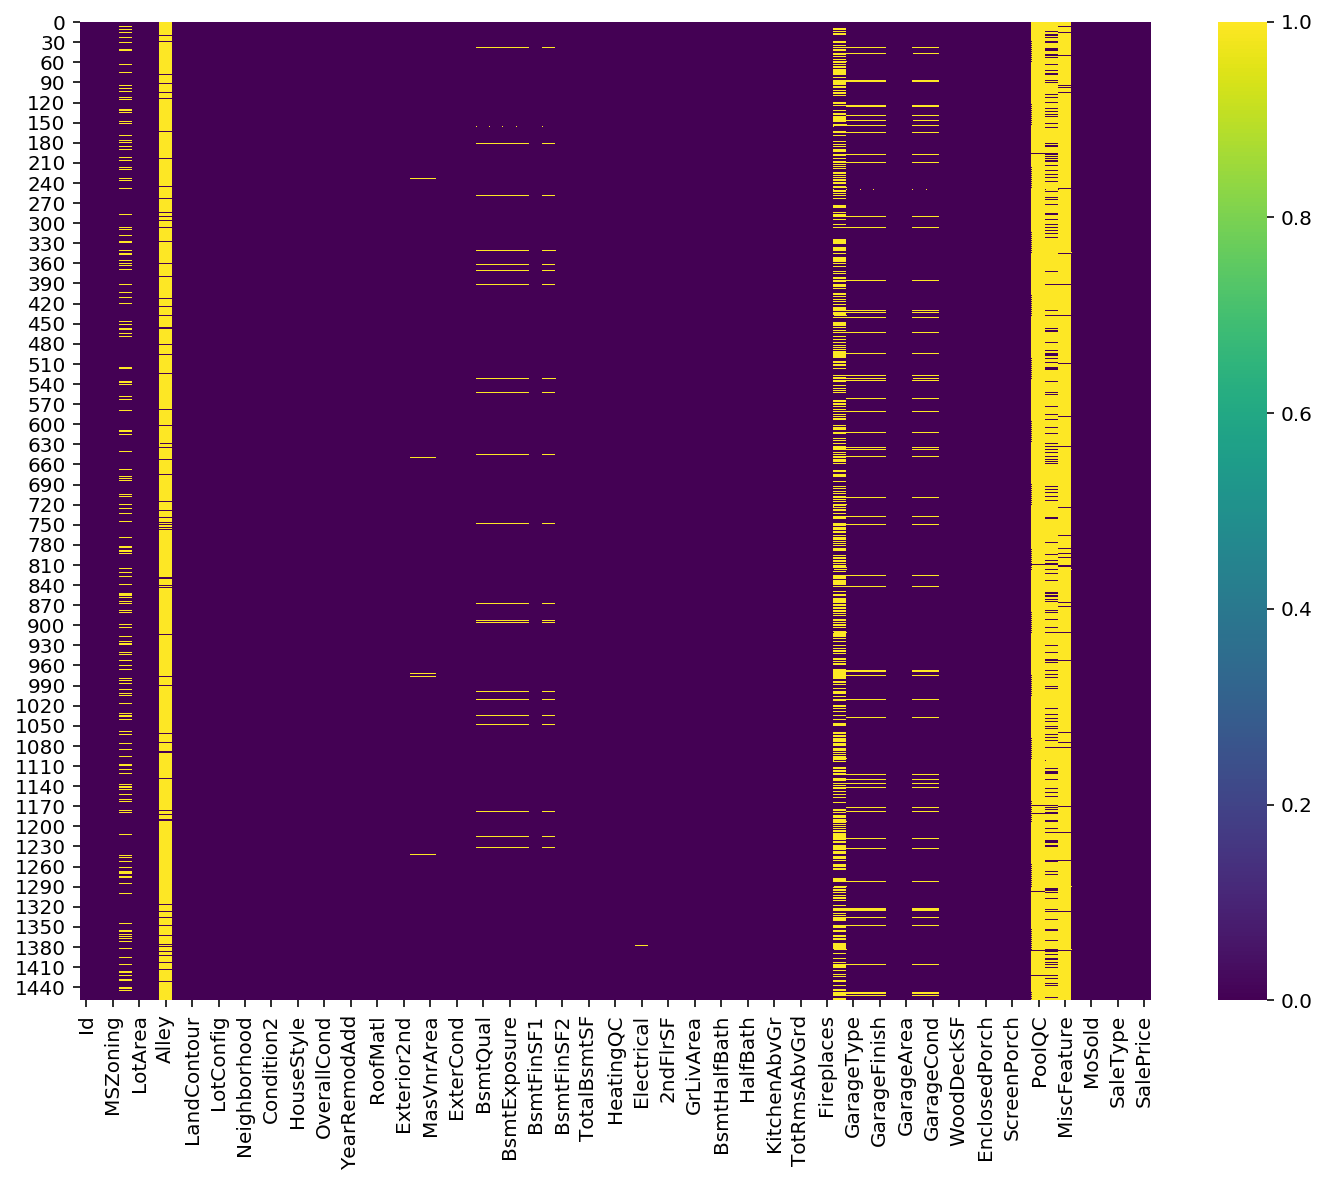

In [57]:
fig, axes=plt.subplots(figsize=(12,9))
sns.heatmap(train_df.isnull(),cmap='viridis')

#### 3. remove outliers

RF are pretty robust to outliers, linear models(Lasso, simple linear regression) are not. so we want to consider removing the outliers when cleaning the data.

Or make models more rodust to outliers. like useing RobustScaler() method for Lasso. or choose Huber as loss parameter in the Gradient Boosting Regression.

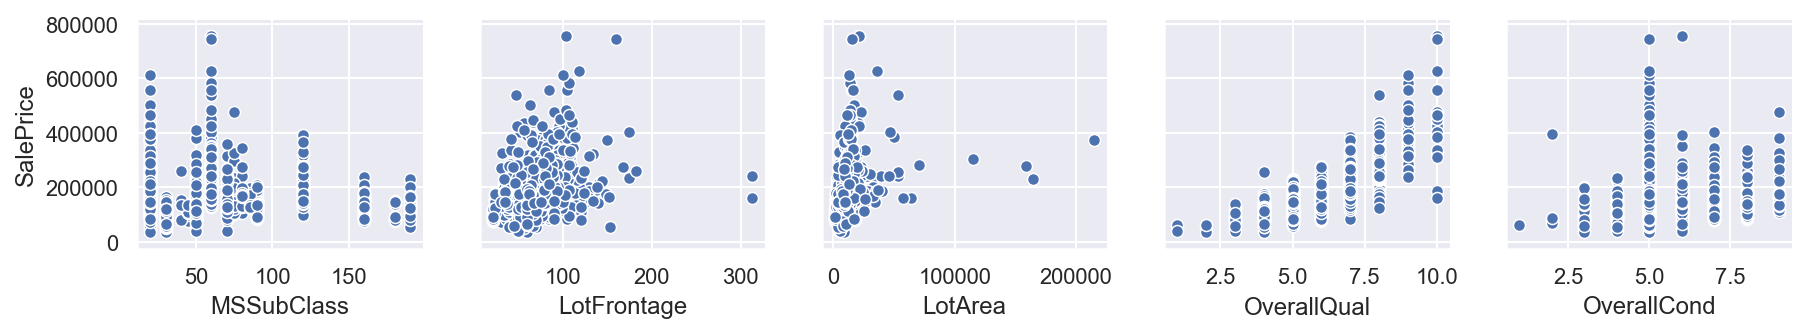

In [60]:
sns.set()
x_vars=quant_vars[0:5]
y_vars=['SalePrice']
sns.pairplot(train_df,size=2.5, x_vars=x_vars, y_vars=y_vars)
plt.show()

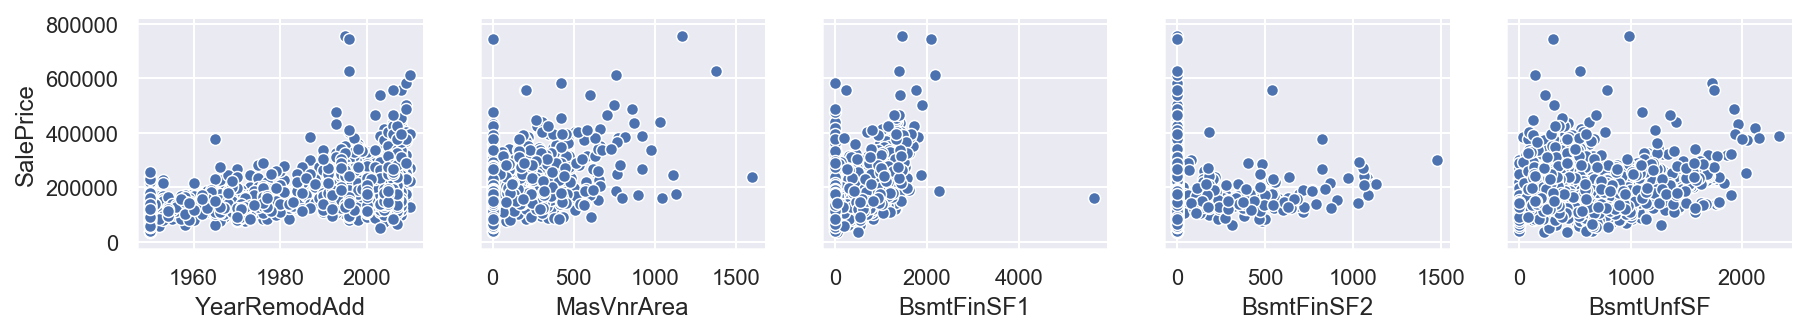

In [61]:
sns.set()
x_vars=quant_vars[6:11]
y_vars=['SalePrice']
sns.pairplot(train_df,size=2.5, x_vars=x_vars, y_vars=y_vars)
plt.show()

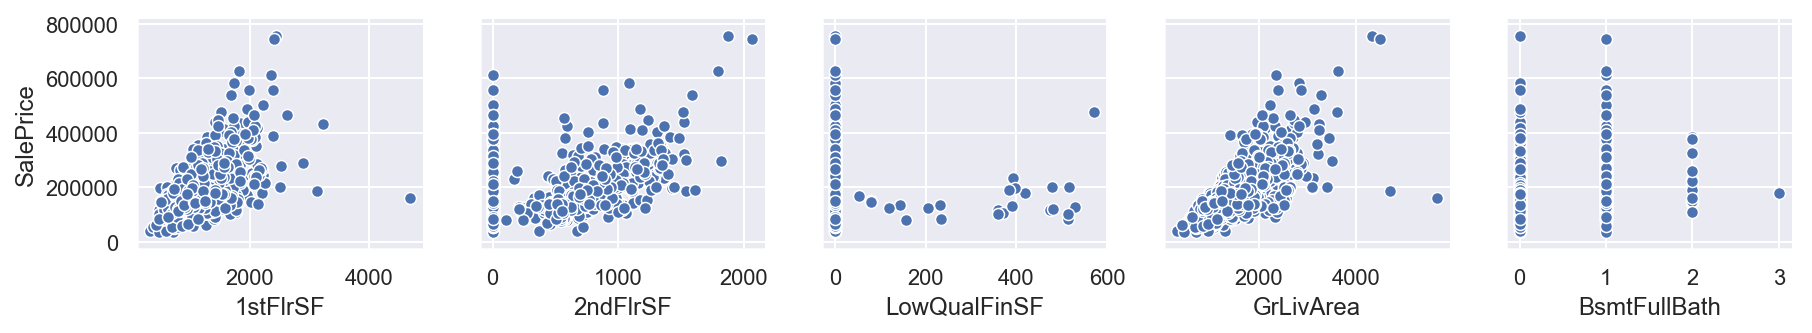

In [62]:
sns.set()
x_vars=quant_vars[12:17]
y_vars=['SalePrice']
sns.pairplot(train_df,size=2.5, x_vars=x_vars, y_vars=y_vars)
plt.show()

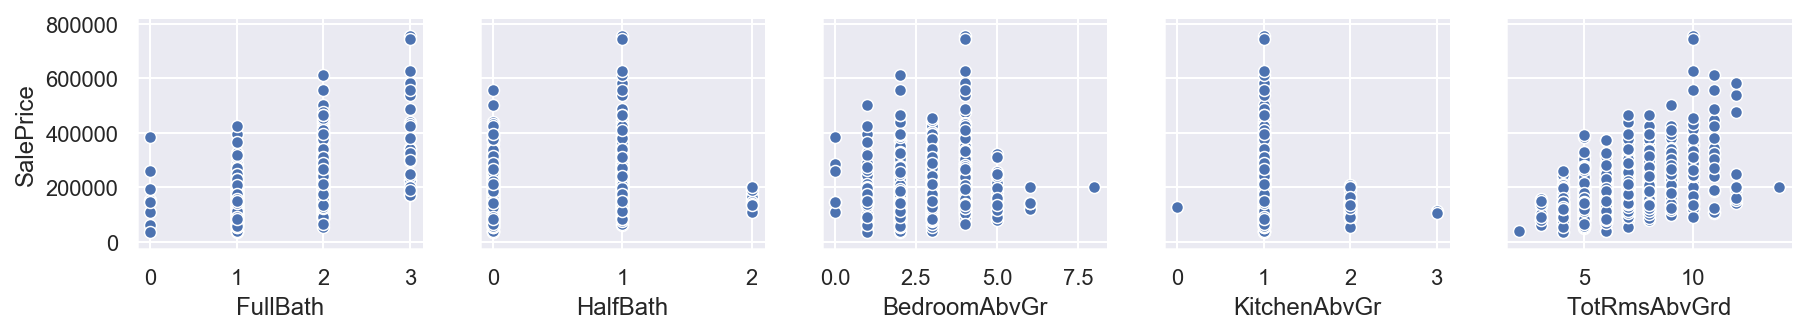

In [63]:
sns.set()
x_vars=quant_vars[18:23]
y_vars=['SalePrice']
sns.pairplot(train_df,size=2.5, x_vars=x_vars, y_vars=y_vars)
plt.show()

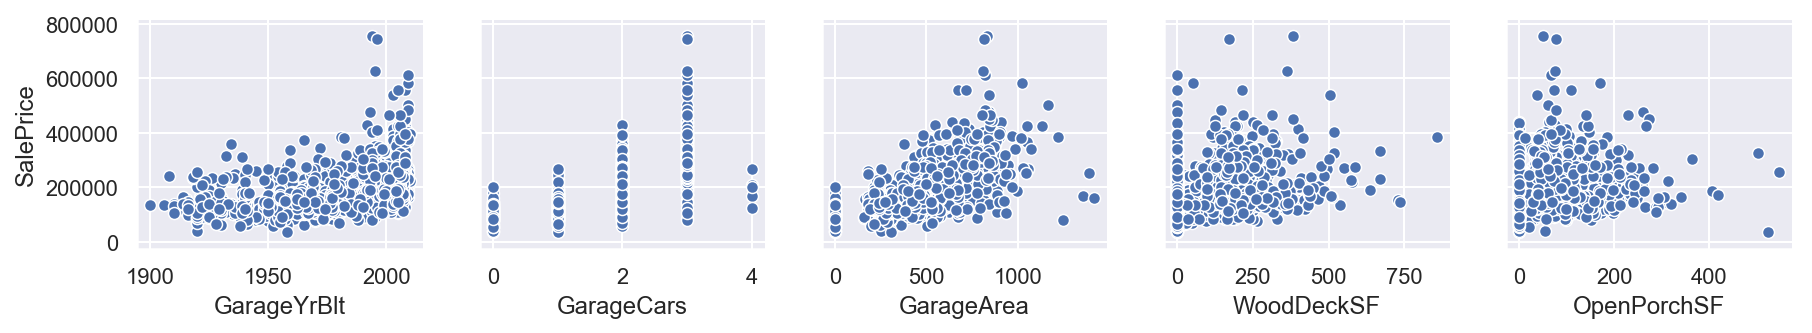

In [64]:
sns.set()
x_vars=quant_vars[24:29]
y_vars=['SalePrice']
sns.pairplot(train_df,size=2.5, x_vars=x_vars, y_vars=y_vars)
plt.show()

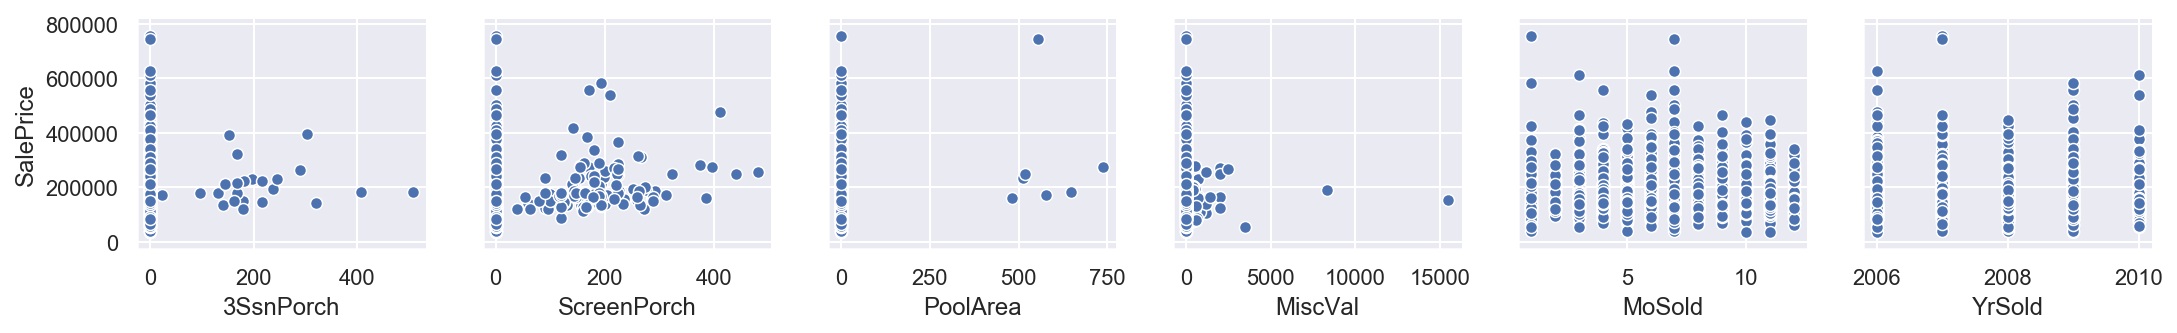

In [65]:
sns.set()
x_vars=quant_vars[30:36]
y_vars=['SalePrice']
sns.pairplot(train_df,size=2.5, x_vars=x_vars, y_vars=y_vars)
plt.show()

the variable GrLivArea has outlier values along with TotalBsmtSf, in particular, for the variable GrLivAream there are two with extremly large GrLivArea that are at a low price(at the botton right corner). These values are outliers.

#### 4. Data correlation